In [162]:
import pandas as pd
import matplotlib.pyplot as plt

use userbased similarity to predict user rating on an item. data from https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce 
1. Compute similarity between users using ratings on items. Users who rated the same item similarly have higher similarity. Usual formula used is the pearson correlation coefficient. This will be the user similarity matrix.
2. To predict an item rating for a user using the similarity matrix
    1. Find users who have rated the item.
    2. Find the top 20 most similar users to the user
    3. Average the ratings of those users for that item.
    4. This average rating is now the predicted rating.
3. To recommend items to a user 
    1. predict the rating for all the items. 
    2. Return the top 20 ratings. (Maybe try things that has not been bought yet)

In [163]:
olist_geolocation_dataset = pd.read_csv('Dataset/olist_geolocation_dataset.csv')
olist_customers_dataset = pd.read_csv('Dataset/olist_customers_dataset.csv')
olist_orders_dataset = pd.read_csv('Dataset/olist_orders_dataset.csv')
olist_order_payments_dataset = pd.read_csv('Dataset/olist_order_payments_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('Dataset/olist_order_reviews_dataset.csv')
olist_order_items_dataset = pd.read_csv('Dataset/olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv('Dataset/olist_products_dataset.csv')

## EDA
try to wordcloud the reviews

In [164]:
import string

new_df = olist_order_reviews_dataset.copy()
translator = str.maketrans('', '', string.punctuation)
new_df['review_comment_message'] = new_df['review_comment_message'].fillna("").astype('str')
new_df['review_comment_message'] = new_df['review_comment_message'].str.lower()
new_df['review_comment_message'] = new_df['review_comment_message'].str.translate(translator)
new_df['review_comment_message'] = new_df['review_comment_message'].str.split()

word_set = set()
for word_list in new_df['review_comment_message']:
    word_set = word_set.union(set(word_list))

print(word_set)

word_count = dict()
for word in word_set:
    word_count[word] = 0

for word_list in new_df['review_comment_message']:
    for word in list(word_list):
        word_count[word] += 1
    
dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
# nltk.word_tokenize("""hello, mama""")


{'rapideztop', 'devolva', 'mês', 'mostram', 'guia', 'lindopequeno', 'descascou', 'prestaçao', '2410', 'outronão', 'estoquepois', 'arrasa', 'exposta', 'bijuterias', '170418', 'porcentagem', 'verifique', 'recebí', '240818', 'frouxo', 'sw', 'satifeito', 'problemapago', 'direitopois', 'lacre', 'resolução', 'starkcomo', 'satisfeitotanto', 'voltagem', 'empoeirada', 'completou', 'satisfeitíssimofelicidades', 'spotify', 'quis', 'discutível', 'kiwi', 'vieram', 'perícula', 'relógiotem', 'madaram', 'preça', 'parcialmentedo', '96', 'veêm', 'escapulario', 'feriado', 'berco', 'grudenta', 'comprometeu', 'recebipor', 'coberdron', 'sevolvendo', 'modo', 'terceirizar', 'dizer', 'descrevendo', 'quintal', 'comunica', '1ano', 'acondicionada', 'assinatura', 'acrilico', '2a', 'viagens', 'cortesia', 'novamentw', 'término', 'cetinho', '10000👍', 'nenem', 'coberto', 'invicta', '92', 'geladeira', 'numeração', 'princesinha', 'rasgar', 'abolça', 'notaaaaaaaaaaaaaaaaa10', 'função', 'apagado', 'tranquilo', 'mãe', 'pra

{'o': 18719,
 'produto': 18157,
 'e': 15650,
 'a': 12155,
 'de': 11306,
 'do': 11143,
 'não': 10710,
 'que': 8306,
 'prazo': 8252,
 'muito': 7822,
 'entrega': 6408,
 'antes': 5608,
 'com': 5593,
 'chegou': 5467,
 'recebi': 5235,
 'no': 5042,
 'foi': 4523,
 'é': 4513,
 'bom': 4512,
 'um': 4338,
 'recomendo': 4165,
 'entregue': 3750,
 'da': 3510,
 'em': 3486,
 'veio': 3244,
 'para': 3159,
 'bem': 3083,
 'na': 3022,
 'mas': 2840,
 'comprei': 2733,
 'qualidade': 2700,
 'uma': 2655,
 'eu': 2386,
 'loja': 2357,
 'ainda': 2304,
 'tudo': 2298,
 'compra': 2163,
 'mais': 2050,
 'meu': 2031,
 'gostei': 1861,
 'ótimo': 1789,
 'estou': 1782,
 'só': 1776,
 'excelente': 1767,
 'como': 1763,
 'até': 1745,
 'super': 1670,
 'dentro': 1453,
 'as': 1448,
 'por': 1436,
 'os': 1435,
 'me': 1413,
 'rápida': 1386,
 'minha': 1342,
 'nao': 1323,
 'boa': 1299,
 'dia': 1297,
 'pedido': 1290,
 'já': 1288,
 'produtos': 1232,
 'se': 1194,
 'site': 1164,
 'sem': 1146,
 'lannister': 1094,
 'pois': 1008,
 'mesmo': 1007

The word count may indicate which characteristics people care about like prazo(deadline), entregue (delivery). This confirms that delivery times are correlated with review score.

(-0.5, 5999.5, 1999.5, -0.5)

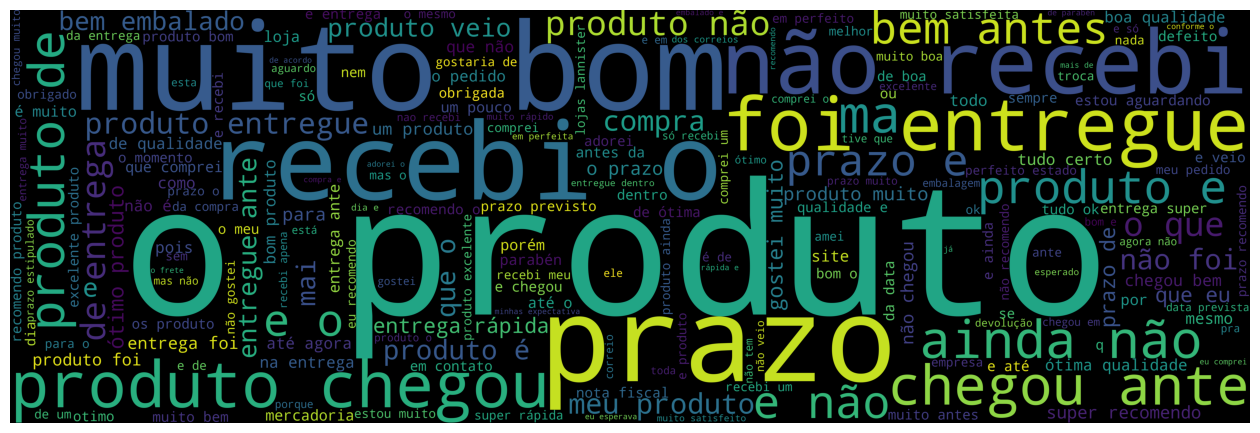

In [165]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

new_df = olist_order_reviews_dataset.copy()
translator = str.maketrans('', '', string.punctuation)
new_df['review_comment_message'] = new_df['review_comment_message'].str.lower()
new_df['review_comment_message'] = new_df['review_comment_message'].fillna("").astype('str')
review_corpus = ' '.join(new_df['review_comment_message'])
review_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=6000,).generate(review_corpus)
plt.figure(figsize=(16,8))
plt.imshow(review_wordcloud)
plt.axis('off')

Use content based filtering to recommend item to a user
1. Compute similarity between users using ratings on items. Users who rated the same item similarly have higher similarity. Usual formula used is the pearson correlation coefficient. This will be the user similarity matrix.

In [166]:
target_cols = ['review_score', 'customer_unique_id', 'product_id']

In [167]:
new_df = (
        olist_order_reviews_dataset
        .set_index('order_id')
        .join(olist_orders_dataset.set_index('order_id'))
        .reset_index()
        .set_index('customer_id')
        .join(olist_customers_dataset.set_index('customer_id'))
        .set_index('order_id')
        .join(olist_order_items_dataset.set_index('order_id'))[target_cols]
        .reset_index()
        .drop('order_id', axis=1)
        )

grouped_df = new_df.groupby(['customer_unique_id', 'product_id'])
result_df = grouped_df.mean().reset_index()
# result_df = result_df.set_index('customer_unique_id')

In [168]:
test_df = result_df.sample(frac=0.02).pivot(index='customer_unique_id', columns='product_id', values='review_score')
test_df.head()

product_id,000b8f95fcb9e0096488278317764d19,008cff0e5792219fae03e570f980b330,009af1277432f1a05742df69cdf72d1e,009df2b0bc078648fc4f5898de8cabff,00c407e056c74eb8040a1233ca6da16f,0105b5323d24fc655f73052694dbbb3a,01078a94cb29913dfda1a962fd4e3400,0116f3b947377cccf0135f8071b54d74,01175f0c6182b4410c669417d7e8268f,0141015d2469c1c5f9d7d377d1cdb44a,...,fe75529a267b76ac6e96f0c322a899a4,fe9dfbe7f974621789683b7b78be2a16,fec95e3df8533d6872300b23b9a5a943,ff3ec972ebd16eb98d55e8ea2fa255ee,ff5bdcc63751127e726cb69cff0cb5de,ff5d87897ed26d564711df324b98ebee,ff5f8606556b625613f069a5a9a48966,ff90ba6020fbb7d7f56613e213e9dc57,ffbe169d395060d7fb975c990581a329,fff0a542c3c62682f23305214eaeaa24
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
000d460961d6dbfa3ec6c9f5805769e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002471155ecd08d208d1376720e2a907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0027324a96d26a2bc7d69262f83c8403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0028a7d8db7b0247652509358ad8d755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0048a779a98a7848514096ff04046079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


mean center the ratings before computing for pearson correlation

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_df_scaled = scaler.fit_transform(test_df.T).T
test_df_scaled = pd.DataFrame(test_df_scaled, index=test_df.index, columns=test_df.columns)
test_df_scaled.head()
# user_sim = test_df.corr(method='pearson')

product_id,000b8f95fcb9e0096488278317764d19,008cff0e5792219fae03e570f980b330,009af1277432f1a05742df69cdf72d1e,009df2b0bc078648fc4f5898de8cabff,00c407e056c74eb8040a1233ca6da16f,0105b5323d24fc655f73052694dbbb3a,01078a94cb29913dfda1a962fd4e3400,0116f3b947377cccf0135f8071b54d74,01175f0c6182b4410c669417d7e8268f,0141015d2469c1c5f9d7d377d1cdb44a,...,fe75529a267b76ac6e96f0c322a899a4,fe9dfbe7f974621789683b7b78be2a16,fec95e3df8533d6872300b23b9a5a943,ff3ec972ebd16eb98d55e8ea2fa255ee,ff5bdcc63751127e726cb69cff0cb5de,ff5d87897ed26d564711df324b98ebee,ff5f8606556b625613f069a5a9a48966,ff90ba6020fbb7d7f56613e213e9dc57,ffbe169d395060d7fb975c990581a329,fff0a542c3c62682f23305214eaeaa24
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
000d460961d6dbfa3ec6c9f5805769e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002471155ecd08d208d1376720e2a907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0027324a96d26a2bc7d69262f83c8403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0028a7d8db7b0247652509358ad8d755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0048a779a98a7848514096ff04046079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Generate the pearson correlation matrix which will serve as the user-user similarity matrix

In [170]:
corr = test_df_scaled.T.corr(method='pearson')
corr

customer_unique_id,000d460961d6dbfa3ec6c9f5805769e1,002471155ecd08d208d1376720e2a907,0027324a96d26a2bc7d69262f83c8403,0028a7d8db7b0247652509358ad8d755,0048a779a98a7848514096ff04046079,0055b522bc89cbfbf376d8b59a628470,0064c96f536ac6250275482221834154,007d9f716ead2bc8712255271a38f609,00842c7d0cedb9e1edad8e9b7d148f09,008b06aba4b5f5b5b94f525ccf520624,...,fe97a20a987dd0adc99328b52be73c4c,fefa5385f7ccc46b5b43cd8b6914d44e,ff2ac5ec37484dd6da5b68adbf162bc5,ff44084bf8313fa8eae5ce6e43e341ed,ff4cec8389a2224122f5dd9edda3950f,ff6447d093bbfa558c51f13162c9a2c7,ff6c80eff6bc50a0c3b10abd65847a2a,ffafb9f09293653c2486abe52e5e05a4,fff2ae16b99c6f3c785f0e052f2a9cfb,fff96bc586f78b1f070da28c4977e810
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
000d460961d6dbfa3ec6c9f5805769e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002471155ecd08d208d1376720e2a907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0027324a96d26a2bc7d69262f83c8403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0028a7d8db7b0247652509358ad8d755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0048a779a98a7848514096ff04046079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6447d093bbfa558c51f13162c9a2c7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ff6c80eff6bc50a0c3b10abd65847a2a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffafb9f09293653c2486abe52e5e05a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
item = test_df.columns[0]
user = test_df.index[100]

def predict_review_score(user: str, item: str) -> float:
    # select users that rated the item
    users = pd.DataFrame(test_df.loc[:, item][test_df.loc[:, item].notnull()])

    # select the similarity score of the users from the similarity matrix
    user_neighborhood = users.join(corr).drop(item, axis=1)

    # get top 20 similar users
    top_users_neighborhood = pd.DataFrame(user_neighborhood.loc[:, user]).sort_values(by=user, ascending=False)[:20]

    # return the mean item review score of the top 20 most similar users 
    return top_users_neighborhood.join(test_df).loc[:, item].mean()

predict_review_score(user, item)

5.0

recommend top predicted reviews

In [ ]:
# Using apply to get row index and column names
def col_predicted_review(row):
    return [predict_review_score(row.name, col) for col in row.index]

user = test_df.index[400]
top_products = pd.DataFrame(test_df.T[user]).apply(col_predicted_review).sort_values(by=user, ascending=False)[:20]
top_products.join(olist_products_dataset.set_index('product_id')).rename(columns={user: 'predicted_review'})[['predicted_review', 'product_category_name']]

In [182]:
user = test_df.index[20]
top_products = pd.DataFrame(test_df.T[user]).apply(col_predicted_review).sort_values(by=user, ascending=False)[:20]
top_products.join(olist_products_dataset.set_index('product_id')).rename(columns={user: 'predicted_review'})[['predicted_review', 'product_category_name']]

,predicted_review,product_category_name
product_id,,
000b8f95fcb9e0096488278317764d19,5.0,utilidades_domesticas
9539cddd99ab3f8ca77b6cad0a0899ea,5.0,esporte_lazer
94dfe961f86c1f33e5387b6c59201fc7,5.0,ferramentas_jardim
94dc79036088835c91a1608825b3207d,5.0,utilidades_domesticas
94938d42be4ea1064db3325c385ee6d6,5.0,esporte_lazer
93c480c7d11c68ba0a71e850da61b674,5.0,informatica_acessorios
93a12c289ca2b78e7069e469f5053ef2,5.0,informatica_acessorios
9394a725ee7e3f1da0d6b22b046cc8d4,5.0,brinquedos
926a505f318353d8634f3c5102756352,5.0,cama_mesa_banho


The issue arises from the sparsity of the similarity matrix, which allows a few users to dominate the predicted review scores for items. In cases where only one user has reviewed a product, the predicted rating for that product will be solely based on this single review for all other users. To improve this, we could generate predicted reviews only for items that have been reviewed by a substantial number of users. 